In [1]:
using InstantiateFromURL
github_project("QuantEcon/quantecon-notebooks-julia", version = "0.5.0")

In [ ]:
using LinearAlgebra, Statistics

## On Data Types

A useful tool for displaying both expressions and code is to use the `@show` macro, which displays the text and the results:

In [5]:
x = 2; y = 1.0
@show 2x - 3y;
@show x + y;

2x - 3y = 1.0
x + y = 3.0


Besides standard data types, complex numbers are another primitive data type, with the imaginary part specified by `im`

In [6]:
x = 1 + 2im

1 + 2im

In [8]:
y = 1 - 2im
x * y

5 + 0im

### Arrays
Can check the dimensions of array using `size()` and `ndims()` function:

In [241]:
a = [1.0, 2.0, 3.0]
ndims(a)

1

In [242]:
size(a)

(3,)

In [244]:
# Column vectors: (both are column vectors)
[1, 2, 3] == [1; 2; 3]

true

Row vectors are 2-dimensional

In [247]:
[1 2 3]

1×3 Array{Int64,2}:
 1  2  3

So in Julia we have both:
- 1-d arrays - i.e. flat arrays
- arrays of size `(1, n)` or `(n, 1)` that represent row or column vectors

Functions that create arrays:

In [248]:
zeros(3)

3-element Array{Float64,1}:
 0.0
 0.0
 0.0

In [250]:
zeros(2, 2)

2×2 Array{Float64,2}:
 0.0  0.0
 0.0  0.0

In [253]:
fill(5.0, 2, 2)
fill(false, 2, 2)  # produces a boolean matrix

2×2 Array{Bool,2}:
 0  0
 0  0

To create an empty array use the `Array()` constructor:

In [254]:
x = Array{Float64}(undef, 2, 2)

2×2 Array{Float64,2}:
 3.95253e-323  2.27847e-314
 4.44659e-323  9.88131e-324

To create a similar sized array we can use the function `similar`

In [255]:
x = [1, 2, 3]
y = similar(x)
y

3-element Array{Int64,1}:
 4681506288
 4744585648
 4744585968

Also can use `similar` to preallocate a vector with a different size but the same shape:

In [257]:
x = [1, 2, 3]
y = similar(x, 2, 2)

2×2 Array{Int64,2}:
 4614842624  4611995472
 4613755040  4744584560

To make column vector explictly 2-d, create a row vector and transpose it

In [258]:
a = [10 20 30 40]'

4×1 Adjoint{Int64,Array{Int64,2}}:
 10
 20
 30
 40

In [259]:
ndims(a)

2

Assigning values to some elements of array is also straightforward:

In [263]:
a = zeros(4)
a[2:end] .= 42
a

4-element Array{Float64,1}:
  0.0
 42.0
 42.0
 42.0

### Special Matrices

In [264]:
d = [1.0, 2.0]
a = Diagonal(d)

2×2 Diagonal{Float64,Array{Float64,1}}:
 1.0   ⋅ 
  ⋅   2.0

In [267]:
b = [1.0 2.0; 3.0 4.0 ]
b - I # subtracts the "identity matrix" from b - note the lack of dimensions of I

2×2 Array{Float64,2}:
 0.0  2.0
 3.0  3.0

In [268]:
using StaticArrays
xdynamic = [1, 2]
xstatic = @SVector [1, 2] # turns it into a highly optimized static vector

f(x) = 2x
@show f(xdynamic)
@show f(xstatic)


f(xdynamic) = [2, 4]
f(xstatic) = [2, 4]


2-element SArray{Tuple{2},Int64,1,2} with indices SOneTo(2):
 2
 4

### Operations on Arrays

In [270]:
a = [-1, 0, 1]

@show length(a)
@show sum(a)
@show mean(a)
@show std(a) # standard deviation
@show var(a) # variance
@show maximum(a)
@show minimum(a)
@show extrema(a) # minimum(a), maximum(a)

length(a) = 3
sum(a) = 0
mean(a) = 0.0
std(a) = 1.0
var(a) = 1.0
maximum(a) = 1
minimum(a) = -1
extrema(a) = (-1, 1)


(-1, 1)

To sort an array:

In [272]:
b = sort(a, rev = true)

3-element Array{Int64,1}:
  1
  0
 -1

In [274]:
b == a  # tests if have the same values

false

In [275]:
b = sort!(a, rev = true)

3-element Array{Int64,1}:
  1
  0
 -1

In [277]:
b == a # tests if have the same values

true

In [278]:
b === a # tests if arrays are identical (i.e share same memory)

true

### Matrix Algebra

For 2-d arrays `*` means matrix multiplication

In [279]:
a = ones(1, 2)
b = ones(2, 2)
a * b

1×2 Array{Float64,2}:
 2.0  2.0

In [280]:
b * a'

2×1 Array{Float64,2}:
 2.0
 2.0

To solve the linear system $AX = B$ for $X$ use `A \ B` 

In [281]:
A = [1 2; 2 3]
B = ones(2, 2)

2×2 Array{Float64,2}:
 1.0  1.0
 1.0  1.0

In [283]:
A \ B

2×2 Array{Float64,2}:
 -1.0  -1.0
  1.0   1.0

If you want an inner product use `dot()` or the unicode `\cdot<TAB>`

In [284]:
ones(2) ⋅ ones(2)

2.0

### Elementwise Operations

In [285]:
ones(2, 2) .* ones(2, 2)

2×2 Array{Float64,2}:
 1.0  1.0
 1.0  1.0

In [286]:
A = -ones(2, 2)
A.^2

2×2 Array{Float64,2}:
 1.0  1.0
 1.0  1.0

Unlike MATLAB and other languages, scalar addition requires `.+` in order to correctly broadcast

In [288]:
x = [1, 2]
x .+ 1

2-element Array{Int64,1}:
 2
 3

For element-wise comparisons also use `.x` style notation

In [290]:
a = [10, 20, 30]
b = [-100, 0, 100]
b .> a

3-element BitArray{1}:
 0
 0
 1

In [291]:
a .== b

3-element BitArray{1}:
 0
 0
 0

In [292]:
b .> 1

3-element BitArray{1}:
 0
 0
 1

This is useful for conditional extraction:

In [295]:
a = randn(4)
a[a .< 0]

4-element Array{Float64,1}:
 -1.6687688356723296 
 -1.321505349333417  
 -0.31263442641957084
 -0.6303200060340487 

### Changing Dimensions

Primary function for changing the dimensions of an array is `reshape()`

In [297]:
a = [10, 20, 30, 40]

4-element Array{Int64,1}:
 10
 20
 30
 40

In [298]:
b = reshape(a, 2, 2)

2×2 Array{Int64,2}:
 10  30
 20  40

To collapse an array along one dimension can use `dropdims()`

In [299]:
a = [1 2 3 4] # two-dimensional

1×4 Array{Int64,2}:
 1  2  3  4

In [300]:
dropdims(a, dims = 1)

4-element Array{Int64,1}:
 1
 2
 3
 4

### Linear Algebra

In [301]:
A = [1 2; 3 4]

2×2 Array{Int64,2}:
 1  2
 3  4

In [304]:
@show det(A)
@show tr(A)
@show eigvals(A)
@show rank(A);

det(A) = -2.0
tr(A) = 5
eigvals(A) = [-0.3722813232690143, 5.372281323269014]
rank(A) = 2


### Ranges

In [306]:
a = 10:12

10:12

In [307]:
a = 0.0:0.1:1.0

0.0:0.1:1.0

Finally, to create a grid with evenly spaced values (i.e. `linspace` on other languages)

In [309]:
xmax = 1.0
xmin = 0.0
n = 10
a = range(xmin, xmax, length = n)
maximum(a) == xmax

true

### Strings

To concatenate strings use `*`

In [9]:
"foo" * "bar"

"foobar"

Some functions for working with strings:

In [10]:
s = "Matias likes climbing"

"Matias likes climbing"

In [11]:
split(s)

3-element Array{SubString{String},1}:
 "Matias"  
 "likes"   
 "climbing"

In [12]:
replace(s, "climbing" => "coding")

"Matias likes coding"

In [13]:
split("this,string,is,a,mess", ",")

5-element Array{SubString{String},1}:
 "this"  
 "string"
 "is"    
 "a"     
 "mess"  

In [14]:
strip(" foobar ") # removes whitespace

"foobar"

In [15]:
match(r"(\d+)", "Top 10") # find digits in string

RegexMatch("10", 1="10")

For more info on the syntax for regular expressions go [here](https://docs.julialang.org/en/v1/manual/strings/#Regular-Expressions-1).

### Containers

We have several basic types for storing collections of data. There are **tuples** which are immutable and can contain different types:

In [17]:
y = ("foo", 2)

("foo", 2)

In [18]:
typeof(y)

Tuple{String,Int64}

An immutable value is one that cannot be altered once it resides in memory. In particular, they do not support item assignment so `x[1] = "test"` would fail. Finally, tuples can be constructed with or without parentheses and they can be unpacked directly into variables

In [19]:
x = ("foo", 1)

("foo", 1)

In [20]:
word, val = x
println("word = $word, val = $val")

word = foo, val = 1


Tuples can be created with a hanging `,` which is useful to create a tuple with only one element:

In [21]:
y = ("foo",)
typeof(y)

Tuple{String}

Named tuples are convenient and high-performance way to manage and unpack sets of parameters, use the `Parameters.jl` package and the `@unpack` macro

In [311]:
using Parameters

function f(parameters)
    @unpack α, β = parameters 
    return α + β
end

parameters = (α = 0.1, β = 0.2)
f(parameters)

0.30000000000000004

In order to manage default values use the `@with_kw` macro

In [314]:
using Parameters
paramgen = @with_kw (α = 0.1, β = 0.2) # create named tuples with defaults

# creates named tuples, replacing defaults
@show paramgen() # calling without arguments gives all defaults
@show paramgen(α = 0.2)
@show paramgen(α = 0.2, β = 0.5);

paramgen() = (α = 0.1, β = 0.2)
paramgen(α=0.2) = (α = 0.2, β = 0.2)
paramgen(α=0.2, β=0.5) = (α = 0.2, β = 0.5)


### Referencing Items
The last element of a sequence can be accesed with the keyword `end`:

In [22]:
x = [10, 20, 30, 40]

4-element Array{Int64,1}:
 10
 20
 30
 40

In [23]:
x[end]

40

In [24]:
x[end-1]

30

Accessing multiple elements is standard:

In [25]:
x[1:3]

3-element Array{Int64,1}:
 10
 20
 30

In [26]:
x[2:end]

3-element Array{Int64,1}:
 20
 30
 40

The same slice notation works on strings:

In [27]:
"foobar"[3:end]

"obar"

### Dictionaries
Another container type - like arrays except that items are named instead of numbered

In [29]:
d = Dict("name" => "Frodo", "age" => 33)

Dict{String,Any} with 2 entries:
  "name" => "Frodo"
  "age"  => 33

In [30]:
d["age"]

33

The strings `name` and `age` are called the **keys**, which are mapped to their associated values. But dictionaries are rarely the right approach (unlike Python)

## Iterating

An _iterable_ is something you can put on the right hand side of `for` and loop over. These include sequence data types like arrays:

In [34]:
actions = ["surf", "ski"]
for action in actions
    println("Matias doesn't $action")
end

Matias doesn't surf
Matias doesn't ski


But it is better to provide an iterator rather than an array as the former is more memory efficient.

Julia provides some functional-style helper functions to facilitate looping without indices. One is `zip()`, which is used for stepping through pairs from two sequences:

In [37]:
countries = ("Japan", "Korea", "China")
cities = ("Tokyo", "Seoul", "Beijing")
for (country, city) in zip(countries, cities)
    println("The capital of $country is $city")
end

The capital of Japan is Tokyo
The capital of Korea is Seoul
The capital of China is Beijing


If we happen to need the index as well as the value, one option is to use `enumerate()`

In [39]:
countries = ("Japan", "Korea", "China")
cities = ("Tokyo", "Seoul", "Beijing")
for (i, country) in enumerate(countries)
    city = cities[i]
    println("The capital of $country is $city")
end

The capital of Japan is Tokyo
The capital of Korea is Seoul
The capital of China is Beijing


### Comprehensibles

An elegant tool for creating new arrays, dictionaries, etc from iterables. Some examples:

In [41]:
doubles = [2i for i in 1:4]

4-element Array{Int64,1}:
 2
 4
 6
 8

In [42]:
animals = ["dog", "cat", "bird"];

In [45]:
plurals = [animal * "s" for animal in animals]

3-element Array{String,1}:
 "dogs" 
 "cats" 
 "birds"

In [47]:
[ i + j for i in 1:3, j in 4:6 ]

3×3 Array{Int64,2}:
 5  6  7
 6  7  8
 7  8  9

In [49]:
[i + j + k for i in 1:3, j in 4:6, k in 7:9 ]

3×3×3 Array{Int64,3}:
[:, :, 1] =
 12  13  14
 13  14  15
 14  15  16

[:, :, 2] =
 13  14  15
 14  15  16
 15  16  17

[:, :, 3] =
 14  15  16
 15  16  17
 16  17  18

Comprehensions can also create arrays of tuples or named tuples:

In [52]:
[ (i,j) for i in 1:2, j in animals]

2×3 Array{Tuple{Int64,String},2}:
 (1, "dog")  (1, "cat")  (1, "bird")
 (2, "dog")  (2, "cat")  (2, "bird")

In [53]:
[ (num = i, animal = j) for i in 1:2, j in animals]

2×3 Array{NamedTuple{(:num, :animal),Tuple{Int64,String}},2}:
 (num = 1, animal = "dog")  …  (num = 1, animal = "bird")
 (num = 2, animal = "dog")     (num = 2, animal = "bird")

## Comparisons and Logical Operators

For _not equal_ use `!=` or `≠` (`\ne<TAB>`)

In [54]:
x != 3 

true

Julia can also test approximate equality with `≈`

In [55]:
1 + 1E-8 ≈ 1

true

Combining expressions is also standard:

In [56]:
true && false

false

In [57]:
true || false

true

## User-Defined Functions

In Julia the `return` statement is optional, so the following functions have same behavior:

In [58]:
function f1(a, b)
    return a*b
end

function f2(a, b)
    a*b
end

f2 (generic function with 1 method)

When no return statement is present, the last value obtained when executing the code block is returned.

A function can have arbitrarily many `return` statements, with execution terminating when the first return is hit:

In [59]:
function foo(x)
    if x > 0
        return "positive"
    end
    return "nonpositive"
end

foo (generic function with 1 method)

In [60]:
foo(1)

"positive"

In [61]:
foo(-1)

"nonpositive"

### Other Syntax for Defining Functions

For short function definitions we have some elegant syntax:

In [62]:
f(x) = sin(1/x)

f (generic function with 1 method)

In [63]:
f(1/pi)

1.2246467991473532e-16

Julia also allows you to define anonymous functions:

In [64]:
map(x -> sin(1/x), randn(3)) # applies function to each element

3-element Array{Float64,1}:
 0.5819330036506918
 0.8722861255744883
 0.9797762607362898

In the following function everything after the `;` is bounded by name rather than the order in the function call. If you don't give it the name when specifying the input you will get an error.

In [67]:
f(x; a = 1) = exp(cos(a * x))
f(pi, a = 2)

2.718281828459045

## Broadcasting

In [69]:
x_vec = [2.0, 4.0, 6.0, 8.0]
y_vex = sin.(x_vec)

4-element Array{Float64,1}:
  0.9092974268256817 
 -0.7568024953079282 
 -0.27941549819892586
  0.9893582466233818 

In general, if `f` is any Julia function then `f.` references the broadcasted version. This also applies to user-defined functions

In [75]:
function chisq(k)
    @assert k > 0
    z = randn(k)
    return sum(z -> z^2, z)
end

chisq (generic function with 1 method)

The macro `assert` will check that the next expression evaluates to `true` and will stop and display an error otherwise.

In [76]:
chisq(3)

1.6269852031718184

In [77]:
chisq(-1)

AssertionError: AssertionError: k > 0

In [78]:
chisq.([1, 2])

2-element Array{Float64,1}:
 1.5468939537272433
 0.6972951779766062

A convenient macro for adding broadcasting on every funcition call is `@.`

In [85]:
x = 1.0:1.0:5.0
y = [2.0, 4.0, 5.0, 6.0, 8.0]
z = similar(y)
@. z = x + y - sin(x) # Make sure to define z before running this

5-element Array{Float64,1}:
  2.1585290151921033
  5.090702573174318 
  7.858879991940133 
 10.756802495307928 
 13.958924274663138 

You can use `Ref` to fix a function parameter you do not want to broadcast over

In [88]:
f(x, y) = [1, 2, 3] ⋅ x + y 
f.(Ref([3, 4, 5]), [2,3]) # broadcasting over the second parameter, fixing first

2-element Array{Int64,1}:
 28
 29

## Higher-Order Functions

Let's use the library `Expectations` and pass a function to the expectation function

In [93]:
using Expectations, Distributions

@show d = Exponential(2.0)

f(x) = x^2
@show expectation(f, d); # computes E(f(x))


d = Exponential(2.0) = Exponential{Float64}(θ=2.0)
expectation(f, d) = 8.00000000000004


A somewhat abstract example, where we create a function that returns a function:

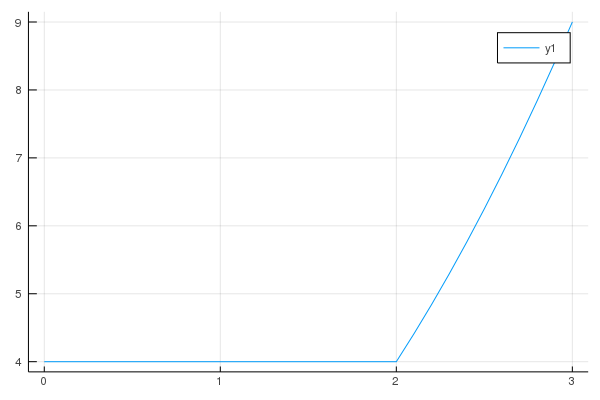

In [94]:
function snapabove(g, a)
    function f(x)
        if x > a
            return g(x)
        else
            return g(a)
        end
    end
    return f 
end

f(x) = x^2
h = snapabove(f, 2.0)

using Plots

gr(fmt=:png)
plot(h, 0.0:0.1:3.0)


For performance sensitive code make sure to wrap it around a function so there are no global variables

In [96]:
function wrapped()
    x = 2.0
    f(y) = x + y
    z = f(4.0)
    
    for i in 1:3
        z += i
    end
    
    println("z = $z")
end

wrapped()

z = 12.0


### Ternary Operators
As an aside, the ternary operator gives a compact if/then/else structure. As an example, we create a function that calculates square root but if input is negative it returns nothing. (But using an assertion is more appropriate)

In [315]:
function f(x)
    x > 0.0 ? sqrt(x) : nothing
end
f(1.0)

1.0

In [318]:
isnothing(f(-1.0))

true

In [320]:
try sqrt(-1.0); catch err; err end

DomainError(-1.0, "sqrt will only return a complex result if called with a complex argument. Try sqrt(Complex(x)).")

## Exercises

### Exercise 1
Compute inner product using the function `zip()`

In [128]:
xs = [1.0, 3.0, 4.0]
ys = [2.0, 3.0, 3.0]
out = sum([x * y for (x, y) in zip(xs, ys)])

23.0

Using comprehension count the number of even numbers between 0 and 99. The function `iseven` returns `true` for even numbers and `false` for odds

In [106]:
count = sum([iseven(i) for i in 0:99])

50

Now count the number of pairs `(a, b)` such that both `a` and `b` are even

In [108]:
pairs = ((2, 5), (4, 2), (9, 8), (12, 10))
count = sum( iseven(i) && iseven(j) for (i,j) in pairs )

2

### Exercise 2

Consider the polynomial:
$$ p(x) = a_0 + a_1x + \dots + a_n x^n = \sum_{i=0}^n a_i x^i $$
Use `enumerate()` to write a function such that `p(x, coeff)` computes the value 

In [124]:
p(x, coeff) = sum([a * x^(i-1) for (i, a) in enumerate(coeff)])
p(2, [1, 3])

7

### Exercise 3
A function that returns the number of capital letters in the string

In [132]:
CAP_count(str) = sum([ i == j for (i,j) in zip(str, uppercase(str))])

CAP_count("MBE")

3

### Exercise 4
Function that takes two sequences and return true if every element in one sequence is also an element of the other, else returns false

In [131]:
function f1(seq_a, seq_b)
    is_subset = true
    for a in seq_a
        if a ∉ seq_b
            is_subset = false
        end
    end
    return is_subset
end

println(f1([1, 2], [1, 2]))
println(f1([1, 2], [1, 3]))

true
false


Alternative is to use set notation:

In [133]:
f2(seq_a, seq_b) = Set(seq_a) ⊆ Set(seq_b)

println(f2([1, 2], [1, 2]))
println(f2([1, 2], [1, 3]))

true
false


### Exercise 5 
Write a function to approximate another function

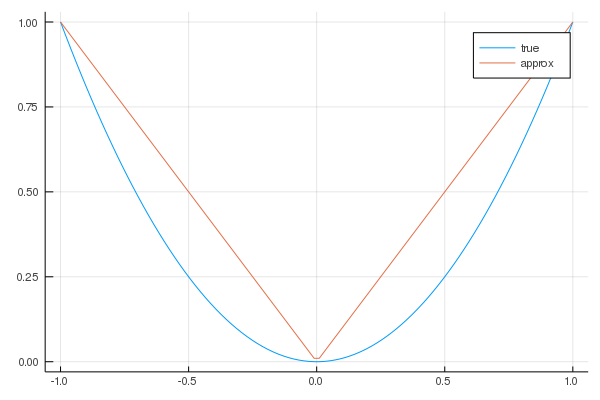

In [165]:
function linapprox(f, a, b, n, x)
    
    # Evaluates piecewise linear interpolant of f at x on interval [a, b] with n evenly spaced
    # grid points 
    
    @assert a <= x <= b
    length_i = b - a
    num_subi = n-1
    step = length_i / num_subi
    
    # Find first grid point larger than x
    point = a
    while point <= x
        point += step
    end
    
    x0, x1 = point - 1, point
    
    return f(x0) + (x - x0) * ( (f(x1) - f(x0))/(x1 - x0)  )
end
    
# Test
f(x) = x^2
g(x) = linapprox(f, -1, 1, 3, x)

xgrid = range(-1.0, 1.0, length = 100)
yvals = f.(xgrid)
yapprox = g.(xgrid)
plot(xgrid, yvals, label = "true")
plot!(xgrid, yapprox, label = "approx")

We now pass a range as argument to the function instead of the interval and number of grid points. 

In [228]:
function linapprox(f, xs, x)
    
    # Evaluates piecewise linear interpolant of f at x on interval given range xs
    
    @assert xs[1] <= x <= xs[end]
    
    pos = 1
    while xs[pos] < x # Can make this more efficient using bisection method, but still not there
        pos += 1
    end
    
    x0, x1 = xs[pos] - step(xs), xs[pos]
    
    return f(x0) + (x - x0) * ( (f(x1) - f(x0))/(x1 - x0)  )
end

linapprox (generic function with 2 methods)

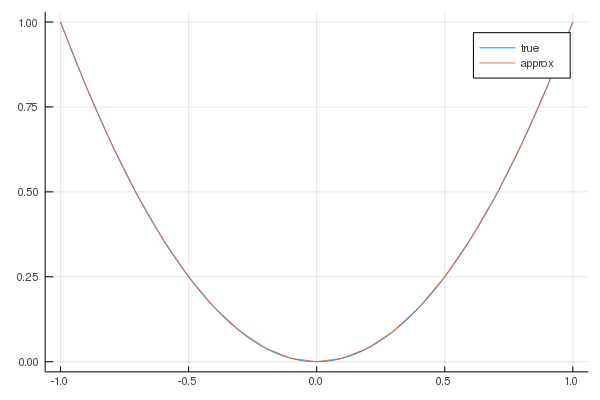

In [235]:
# Test
xs = -1.0:0.1:1.0
f(x) = x^2
g(x) = linapprox(f, xs, x)
xgrid = range(-1.0, 1.0, length = 100)
yvals = f.(xgrid)
yapprox = g.(xgrid)
plot(xgrid, yvals, label = "true")
plot!(xgrid, yapprox, label = "approx")